In [477]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
from scipy.stats import norm
import statistics as st

In [163]:
df= pd.read_csv("data.csv") #Reading the CSV file using Pandas

In [164]:
df.sample(10) #Displaying any 10 Records

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
47722,155275,0,Cash loans,M,Y,N,1,441000.0,1350000.0,1350000.0,...,-1767,1,1,0,1,0,Managers,3.0,TUESDAY,1
12737,114847,0,Cash loans,F,N,Y,0,135000.0,72000.0,72000.0,...,-3178,1,1,0,1,0,Sales staff,2.0,THURSDAY,1
62260,172208,0,Cash loans,F,N,Y,0,72000.0,295168.5,238500.0,...,365243,1,0,0,1,0,NaN,2.0,SATURDAY,1
94908,210208,0,Cash loans,F,N,N,0,135000.0,573628.5,463500.0,...,365243,1,0,0,1,0,NaN,2.0,TUESDAY,1
44827,151925,0,Cash loans,M,N,N,2,157500.0,573628.5,463500.0,...,-568,1,1,1,1,0,Managers,4.0,SATURDAY,2
63750,173921,1,Cash loans,M,N,Y,0,225000.0,485640.0,450000.0,...,-670,1,1,0,1,0,Waiters/barmen staff,1.0,THURSDAY,1
84741,198318,0,Cash loans,F,N,N,0,157500.0,862560.0,720000.0,...,-2842,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
67205,177938,0,Cash loans,F,Y,N,0,180000.0,536917.5,463500.0,...,-2180,1,1,0,1,0,Sales staff,1.0,MONDAY,1
78427,190921,0,Cash loans,F,Y,Y,0,135000.0,544491.0,454500.0,...,-3925,1,1,0,1,0,High skill tech staff,2.0,FRIDAY,1
10180,111853,0,Cash loans,F,N,N,0,180000.0,450000.0,450000.0,...,-403,1,1,1,1,0,Laborers,2.0,MONDAY,1


In [165]:
df.keys() # These are the necessary columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [166]:
df.shape # Shape of dataset before data cleaning

(100000, 24)

There are Total 100k customer's details are given 

In [167]:
df.describe().T   # All the statistic related to the dataFrame

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,100000.0,158006.140860,33481.166996,100002.0,129076.75,157877.0,186982.25,216090.0
TARGET,100000.0,0.080930,0.272729,0.0,0.00,0.0,0.00,1.0
CNT_CHILDREN,100000.0,0.417390,0.721014,0.0,0.00,0.0,1.00,12.0
AMT_INCOME_TOTAL,100000.0,169426.070273,383500.744277,25650.0,112500.00,144000.0,202500.00,117000000.0
AMT_CREDIT,100000.0,599003.446500,402051.959121,45000.0,270000.00,513040.5,808650.00,4050000.0
AMT_GOODS_PRICE,99919.0,538345.148971,369397.724642,45000.0,238500.00,450000.0,679500.00,4050000.0
DAYS_EMPLOYED,100000.0,63292.222060,140839.697296,-17531.0,-2758.00,-1219.0,-291.00,365243.0
MOBILE,100000.0,0.999990,0.003162,0.0,1.00,1.0,1.00,1.0
WORK_PHONE,100000.0,0.821280,0.383120,0.0,1.00,1.0,1.00,1.0
HOME_PHONE,100000.0,0.199740,0.399807,0.0,0.00,0.0,0.00,1.0


In [168]:
df.info() # Infor of the dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

# Data Cleaning

In [169]:
df.isnull().sum()  # Checking for null values

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

# Lets Treat the NAN values

Filling up NAME_TYPE_SUITE collumn Nan values

In [170]:
df["NAME_TYPE_SUITE"].fillna(df["NAME_TYPE_SUITE"].mode()[0],inplace=True)   

Filling up OCCUPATION_TYPE collumn Nan values

In [171]:
df["OCCUPATION_TYPE"].fillna("Not Known",inplace=True)

Filling up CNT_FAM_MEMBERS collumn Nan values

In [172]:
df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].mode()[0],inplace=True)

Filling up AMT_GOODS_PRICE collumn Nan values

In [173]:
df["AMT_GOODS_PRICE"] = df["AMT_GOODS_PRICE"].fillna(df.AMT_CREDIT) # AMT_GOODS_PRICE and 
                                                                    #AMT_CREDIT both are same for revolving type loan

In [174]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

# Finding Duplicate Values

In [175]:
df_predup=df.iloc[:,1:]

In [176]:
df_predup.duplicated().sum()

333

Number of duplicates = 333

In [177]:
df.drop_duplicates(subset=df.columns.difference(['SK_ID_CURR']),inplace=True,keep='first')

In [178]:
df_predup=df.iloc[:,1:]
df_predup.duplicated().sum()

0

In [179]:
df.shape

(99667, 24)

After Deleting the duplicated values we are left with 99667 entries

# Univariate Data Analysis

In [180]:
#Defining a function to isolate the categorical and Continuous data

def cat_or_cont(df):
    cat=[]
    cont=[]
    for col in df.keys():
        if df[col].nunique() >50:
            cont.append(col)
        else:
            cat.append(col)
    print(tabulate({"Categorical":cat,"Continuous":cont},headers="keys"))

In [181]:
cat_or_cont(df) # Isolating Categorical and Continuous data

Categorical          Continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [229]:
def uni_count_plot(df,col):
    ax=sns.countplot(df[col,linewidth=3)
    for bar in ax.patches:
        h= bar.get_height()
        tot= len(df[col])
        perc=(h/tot)*100
        str1= str(h)+", "+str(round(perc,2))+"%"
        x= bar.get_x()+bar.get_width()/2
        ax.annotate(str1, (x, h), va = "bottom", ha ="center" )
    

In [233]:
def uni_pie_plot(df,col):
    data= df[col].value_counts()
    label= df[col].value_counts().keys()
    plt.pie(x=data,labels=label,autopct='%.2f%%',radius=1.5)

# Target 1 or 0 count

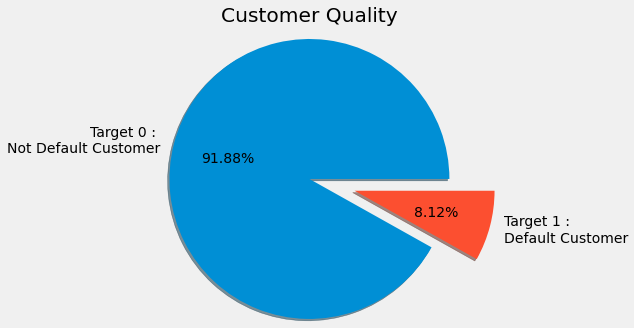

In [535]:
data= df["TARGET"].value_counts()
label= ["Target 0 : \nNot Default Customer","Target 1 :\nDefault Customer"]
plt.figure(figsize=(5,4))
plt.pie(x=data,labels=label,autopct='%.2f%%',radius=1.5,explode=[0.0,0.5],shadow=True)
plt.style.use("fivethirtyeight")
plt.title("Customer Quality",y=1.15)
plt.show()

In [545]:
data

0    91485
1     8090
Name: TARGET, dtype: int64

8.12% of total customers are Default Cutomer

# Gender

In [531]:
df.GENDER.value_counts()
#There are only 3 XNA gender is present
#For better analysis we are deleting those entries

F    65504
M    34071
Name: GENDER, dtype: int64

In [186]:
df=df[df["GENDER"]!="XNA"]

1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first \
    Y installments of the loan in our sample, \
0 - all other cases

C:\Users\kalya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

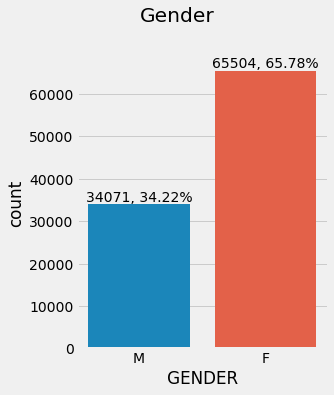

In [544]:
plt.figure(figsize=(4,5))
uni_count_plot(df,"GENDER",)
plt.title("Gender",y=1.1,x=0.4)
plt.plot()

Male applicants = Male Applicants:34071 (34%) \
Female Applicants: 65504 (66%)


# AMT_INCOME_TOTAL

In [187]:
df.AMT_INCOME_TOTAL.describe().astype('int64')

count        99664
mean        169606
std         384126
min          25650
25%         112500
50%         147600
75%         202500
max      117000000
Name: AMT_INCOME_TOTAL, dtype: int64

In [189]:
df[df.AMT_INCOME_TOTAL>1000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1504,101769,0,Revolving loans,M,Y,Y,0,1080000.0,180000.0,180000.0,...,-5536,1,1,0,1,0,Not Known,2.0,FRIDAY,0
1723,102015,0,Cash loans,F,N,Y,0,1935000.0,269550.0,225000.0,...,365243,1,0,0,1,0,Not Known,2.0,MONDAY,1
3371,103938,0,Cash loans,F,N,N,1,1350000.0,2410380.0,2250000.0,...,-843,1,1,0,1,0,Managers,3.0,SUNDAY,2
4603,105384,0,Revolving loans,F,Y,Y,0,1350000.0,405000.0,405000.0,...,-4768,1,1,0,1,0,Managers,2.0,TUESDAY,0
7061,108224,0,Cash loans,F,Y,N,0,1035000.0,2695500.0,2250000.0,...,-490,1,1,1,1,0,Accountants,1.0,WEDNESDAY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95159,210485,0,Revolving loans,M,Y,Y,2,1350000.0,900000.0,900000.0,...,-3008,1,1,0,1,0,Managers,4.0,MONDAY,1
95940,211386,0,Cash loans,F,Y,Y,2,1125000.0,900000.0,900000.0,...,-2653,1,1,1,1,0,Managers,4.0,TUESDAY,1
96710,212267,0,Cash loans,M,Y,N,2,1125000.0,2330190.0,2250000.0,...,-6083,1,1,0,1,0,Managers,4.0,MONDAY,2
97169,212804,0,Cash loans,M,Y,N,0,1575000.0,276277.5,238500.0,...,365243,1,0,0,1,0,Not Known,2.0,TUESDAY,1


In [195]:
df=df[df.AMT_INCOME_TOTAL<1000000]


[]

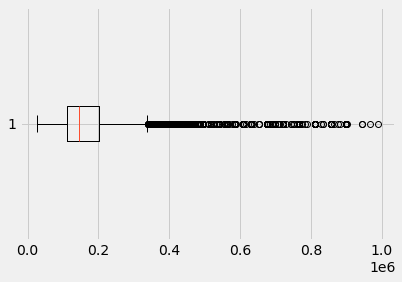

In [197]:
plt.boxplot(df["AMT_INCOME_TOTAL"],vert=False)
plt.plot()

In [198]:
df.AMT_INCOME_TOTAL.describe().astype('int64')

count     99580
mean     167238
std       89714
min       25650
25%      112500
50%      144450
75%      202500
max      990000
Name: AMT_INCOME_TOTAL, dtype: int64

In the AMT_INCOME_Total column there are total 83 columns that is greater than 1000000 USD, which are very far \
from the mean so we are considering them as outlier.\
Due to this the standard deviatiin has been reduced by 4 times

# AMT_CREDIT

In [199]:
df.AMT_CREDIT.describe().astype('int64')

count      99580
mean      599009
std       401736
min        45000
25%       270000
50%       513531
75%       808650
max      4050000
Name: AMT_CREDIT, dtype: int64

[]

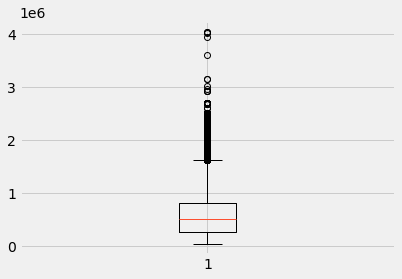

In [201]:
plt.boxplot(df.AMT_CREDIT)
plt.plot()

In [204]:
df[df.AMT_CREDIT>3500000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
14643,117085,0,Cash loans,F,Y,N,2,749331.0,3956274.0,3825000.0,...,-989,1,1,1,1,0,Managers,4.0,MONDAY,1
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,4050000.0,...,-1372,1,1,1,1,0,Managers,3.0,WEDNESDAY,1
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,4050000.0,...,-201,1,1,1,1,1,Managers,4.0,THURSDAY,1
53936,162494,0,Cash loans,M,Y,N,0,900450.0,3600000.0,3600000.0,...,-1250,1,1,1,1,0,Managers,1.0,WEDNESDAY,1
95571,210956,0,Cash loans,M,N,Y,0,430650.0,4031032.5,3712500.0,...,-299,1,1,1,1,0,Managers,1.0,MONDAY,1


In [205]:
df=df[df.AMT_CREDIT<3500000]

[]

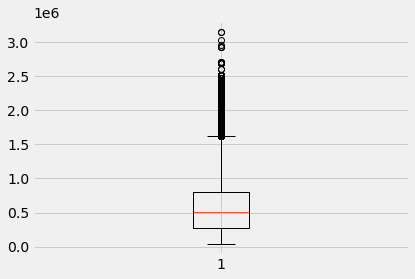

In [206]:
plt.boxplot(df.AMT_CREDIT)
plt.plot()

In [207]:
df.AMT_CREDIT.describe().astype('int64')

count      99575
mean      598841
std       401048
min        45000
25%       270000
50%       513531
75%       808650
max      3150000
Name: AMT_CREDIT, dtype: int64

This is giving better distribution for AMT_Credit

# DAYS_EMPLOYED

In [208]:
df.DAYS_EMPLOYED.describe()

count     99575.000000
mean      62328.622837
std      140025.461699
min      -17531.000000
25%       -2764.000000
50%       -1225.000000
75%        -300.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [210]:
df[df.DAYS_EMPLOYED==365243]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,913500.0,...,365243,1,0,0,1,0,Not Known,2.0,WEDNESDAY,1
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,135000.0,...,365243,1,0,0,1,0,Not Known,2.0,FRIDAY,1
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,225000.0,...,365243,1,0,0,1,0,Not Known,2.0,FRIDAY,1
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,225000.0,...,365243,1,0,0,1,0,Not Known,2.0,FRIDAY,1
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,675000.0,...,365243,1,0,0,1,0,Not Known,1.0,WEDNESDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,216037,0,Cash loans,F,N,N,0,103500.000,540000.0,540000.0,...,365243,1,0,0,1,0,Not Known,1.0,TUESDAY,1
99963,216053,0,Cash loans,F,Y,Y,0,67500.000,544491.0,454500.0,...,365243,1,0,0,1,0,Not Known,2.0,FRIDAY,1
99976,216067,0,Cash loans,M,Y,Y,0,180000.000,1002870.0,922500.0,...,365243,1,0,0,1,0,Not Known,2.0,MONDAY,1
99981,216072,0,Cash loans,F,N,Y,0,35100.000,294322.5,243000.0,...,365243,1,0,0,1,0,Not Known,2.0,SUNDAY,1


Number of days Employed cannot be equal to 365243. It is clearly an human error. We are replacing these values with 0

In [218]:
df[df.DAYS_EMPLOYED==365243]["DAYS_EMPLOYED"]=0

C:\Users\kalya\AppData\Local\Temp/ipykernel_13564/2609921901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.DAYS_EMPLOYED==365243]["DAYS_EMPLOYED"]=0


In [220]:
df.loc[df["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = 0

<function matplotlib.pyplot.show(close=None, block=None)>

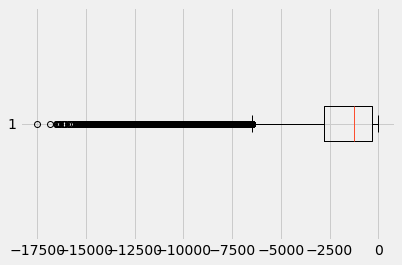

In [224]:
plt.boxplot(df.DAYS_EMPLOYED,vert=False)
plt.show

Now we are getting a much better distribution

# NAME_CONTRACT_TYPE

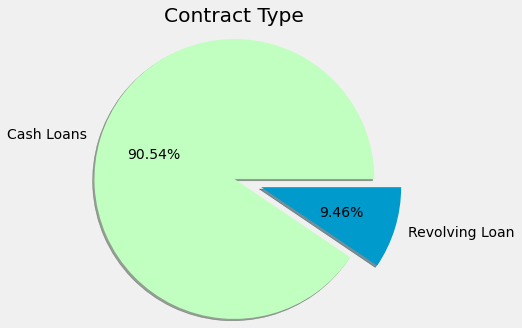

In [242]:
data= df["NAME_CONTRACT_TYPE"].value_counts()
label= ["Cash Loans","Revolving Loan"]
plt.figure(figsize=(5,4))
plt.pie(x=data,labels=label,autopct='%.2f%%',radius=1.5,explode=[0.0,0.3],shadow=True,colors=["#C1FFC1","#009ACD"])
plt.title("Contract Type",y=1.15)
plt.show()

In [ ]:
AMT_CREDIT AND AMT_GOODS_PRICE

In [243]:
TOTAL_AMOUNT_CREDIT = df.AMT_CREDIT.sum()
Average_AMOUNT_CREDIT = df.AMT_CREDIT.mean()

TOTAL_AMT_GOODS_PRICE = df.AMT_GOODS_PRICE.sum()
Average_AMT_GOODS_PRICE = df.AMT_GOODS_PRICE.mean()

print("Total Amount Credit =  ",TOTAL_AMOUNT_CREDIT)
print("Average Amount Credit = ",Average_AMOUNT_CREDIT)

print("Total Amount Goods price =  ",TOTAL_AMT_GOODS_PRICE)
print("Average AmountGoods price = ",Average_AMT_GOODS_PRICE)

Total Amount Credit =   59629687245.0
Average Amount Credit =  598841.9507406477
Total Amount Goods price =   53561386440.0
Average AmountGoods price =  537899.9391413508


# CAR

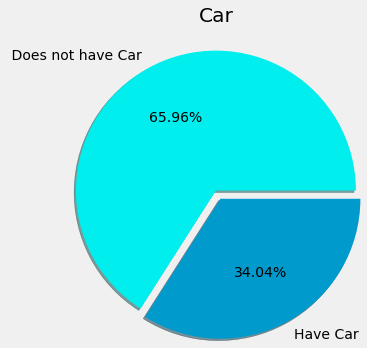

In [254]:
data= df["Car"].value_counts()
label= [" Does not have Car","Have Car"]
plt.figure(figsize=(5,4))
plt.pie(x=data,labels=label,autopct='%.2f%%',radius=1.5,explode=[0.0,0.1],shadow=True,colors=["#00EEEE","#009ACD"])
plt.title("Car",y=1.2)
plt.show()

Whereas, 34% of all the applicants owns at least a personal Car


# HOUSE

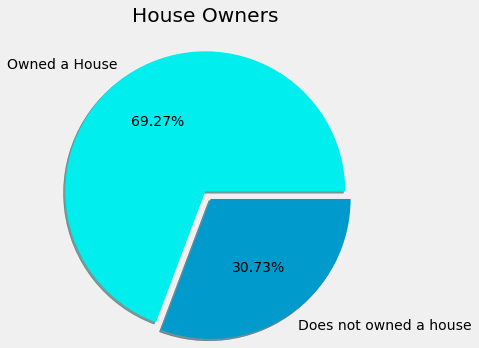

In [255]:
data= df["House"].value_counts()
label= ["Owned a House","Does not owned a house"]
plt.figure(figsize=(5,4))
plt.pie(x=data,labels=label,autopct='%.2f%%',radius=1.5,explode=[0.0,0.1],shadow=True,colors=["#00EEEE","#009ACD"])
plt.title("House Owners",y=1.2)
plt.show()

69% of all the applicants owns at least a house


# NAME_TYPE_SUITE

C:\Users\kalya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Different Accomopany for Applicants at the time of application ')

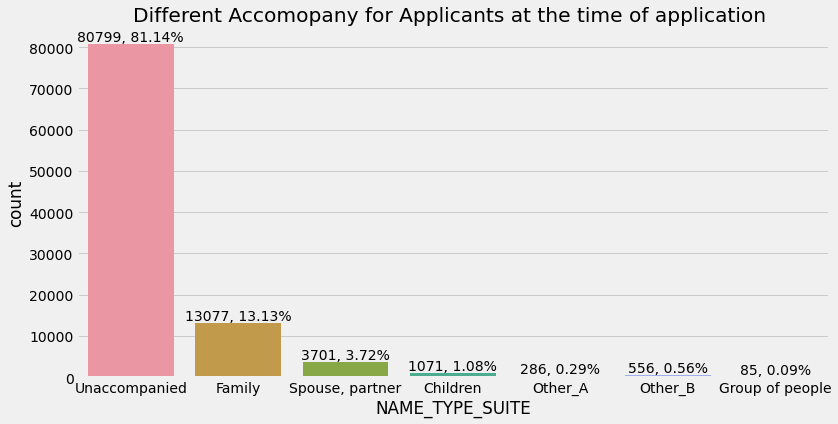

In [619]:
df.NAME_TYPE_SUITE.value_counts()
plt.figure(figsize=(12,6))
uni_count_plot(df,"NAME_TYPE_SUITE")
plt.title("Different Accomopany for Applicants at the time of application ")

81% of clients are unaccompanied

# Relation between AMT_CREDIT and  AMT_GOODS_PRICE 

C:\Users\kalya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.1, 'Relation between Amount Goods Price and Amount Credit')

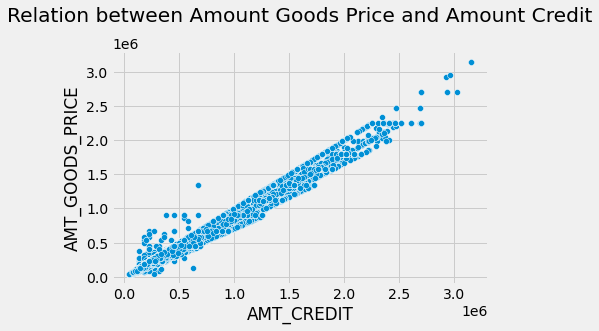

In [618]:
sns.scatterplot(df.AMT_CREDIT,df.AMT_GOODS_PRICE)
plt.title("Relation between Amount Goods Price and Amount Credit",y=1.1)

In [483]:
r=df.AMT_CREDIT.corr(df.AMT_GOODS_PRICE)
r

0.9868530108118284

In [ ]:
As Coefficient of correlation is almost 1 so we can say that AMT_GOODS_PRICE and AMT_GOODS_PRICE

# APPLICATION_DAY

C:\Users\kalya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Day_wise Loan Approval')

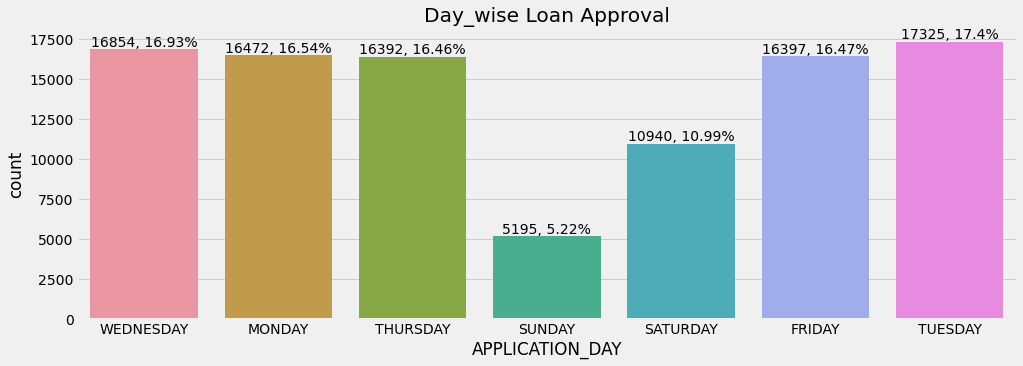

In [552]:

plt.figure(figsize=(15,5))
uni_count_plot(df,"APPLICATION_DAY")
plt.title("Day_wise Loan Approval")

Clearly apart from weekends throughout the week the number of application is almost uniform


# Bivariate Analysis

# GENDER VS TARGET

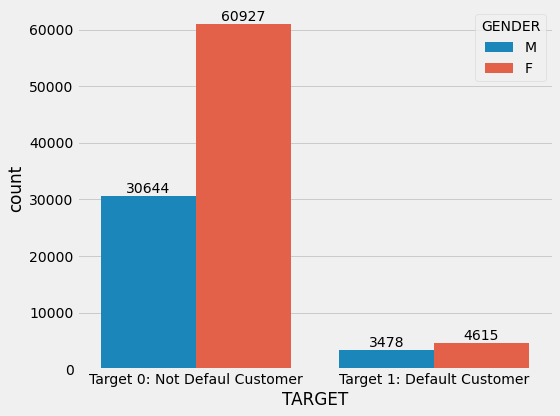

In [26]:
#NOT IMOPORTANT
plt.figure(figsize=(8,6))
ax=sns.countplot(x= "TARGET", hue="GENDER",data=df)
ax.set_xticklabels(["Target 0: Not Defaul Customer","Target 1: Default Customer"])
for bar in ax.patches:
    h=bar.get_height()
    x= bar.get_x()+bar.get_width()/2
    ax.annotate(h, (x, h), va = "bottom", ha ="center" )
plt.tight_layout()
    

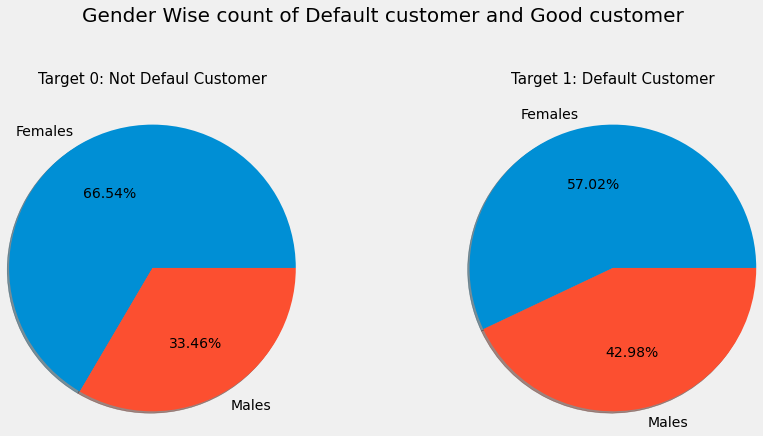

In [27]:
data1= df[df["TARGET"]==0]["GENDER"].value_counts()
data2= df[df["TARGET"]==1]["GENDER"].value_counts()
label1= ["Females","Males"]
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
plt.pie(x=data1,labels=label1,autopct='%.2f%%',radius=1.5,explode=[0.0,0.0],shadow=True)
plt.title("Target 0: Not Defaul Customer",y=1.25,size=15)

plt.subplot(1,2,2)
plt.pie(x=data2,labels=label1,autopct='%.2f%%',radius=1.5,explode=[0.0,0.0],shadow=True)
plt.title("Target 1: Default Customer",y=1.25,size=15)
plt.tight_layout()

plt.suptitle("Gender Wise count of Default customer and Good customer",size=20,y=1.05)
plt.show()

For Not default customers 66.5 % are Female but for defaulters the percentage gets reduced to 57%


# LET US FIRST FOCUS ON THOSE Clients with  payment difficulties

In [550]:
df_T1= df[df.TARGET==1]
df_T0 = df[df.TARGET==0]

In [551]:
df_T1.AMT_CREDIT.sum()

4502928379.5

In [555]:
print("Statistical Analysis: For defaulter")
df_T1.describe().T

Statistical Analysis: For defaulter


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,8090.0,158359.031768,33452.900595,100002.0,129492.0,158105.0,187691.75,216057.0
TARGET,8090.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
CNT_CHILDREN,8090.0,0.462546,0.762999,0.0,0.0,0.0,1.00,11.0
AMT_INCOME_TOTAL,8090.0,159994.904574,82388.977701,25650.0,112500.0,135000.0,202500.00,945000.0
AMT_CREDIT,8090.0,556604.249629,340578.337053,45000.0,284400.0,497520.0,744828.75,3020760.0
AMT_GOODS_PRICE,8090.0,487892.371817,306677.093120,45000.0,238500.0,450000.0,675000.00,2961000.0
DAYS_EMPLOYED,8090.0,-1608.556489,1864.615392,-14285.0,-2146.0,-1031.0,-374.00,0.0
MOBILE,8090.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
WORK_PHONE,8090.0,0.878492,0.326737,0.0,1.0,1.0,1.00,1.0
HOME_PHONE,8090.0,0.235105,0.424091,0.0,0.0,0.0,0.00,1.0


In [556]:
print("Statistical Analysis: For Not defaulter")
df_T0.describe().T

Statistical Analysis: For Not defaulter


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,91485.0,157907.662087,33478.626813,100003.0,128967.0,157759.0,186823.0,216090.0
TARGET,91485.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
CNT_CHILDREN,91485.0,0.414691,0.717751,0.0,0.0,0.0,1.0,12.0
AMT_INCOME_TOTAL,91485.0,167848.535457,90207.076456,25650.0,112500.0,148500.0,202500.0,990000.0
AMT_CREDIT,91485.0,602577.022086,405752.153017,45000.0,270000.0,517500.0,810441.0,3150000.0
AMT_GOODS_PRICE,91485.0,542322.098180,372912.774578,45000.0,238500.0,450000.0,688500.0,3150000.0
DAYS_EMPLOYED,91485.0,-1995.884167,2345.749932,-17531.0,-2820.0,-1250.0,-290.0,0.0
MOBILE,91485.0,0.999989,0.003306,0.0,1.0,1.0,1.0,1.0
WORK_PHONE,91485.0,0.819074,0.384959,0.0,1.0,1.0,1.0,1.0
HOME_PHONE,91485.0,0.197289,0.397955,0.0,0.0,0.0,0.0,1.0


# Mobile reachability for Defaulter clients

Text(0.5, 1.2, 'Mobile Reachability for Default Clients')

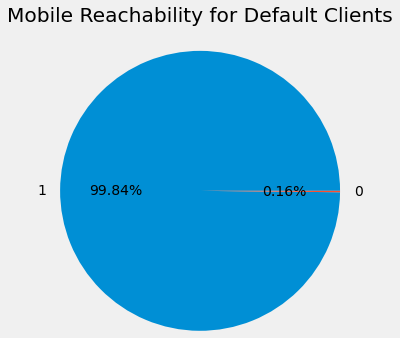

In [615]:
uni_pie_plot(df_T1,"MOBILE_REACHABLE")
plt.title("Mobile Reachability for Default Clients",y=1.2)

99.85 % defaulter’s Mobile phone is in reachable condition. \
Firm can communicate with them and send them follow up notification for upcoming instalment.


# Credit_Limit for Different Gender

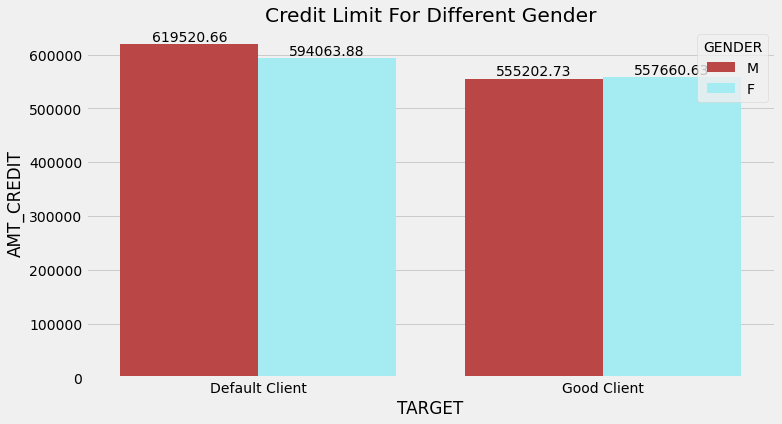

In [572]:
plt.figure(figsize=(11,6))
ax=sns.barplot(x='TARGET',y = 'AMT_CREDIT',hue="GENDER",data= df,ci=False,palette=["#CD3333","#98F5FF"])
ax.set_xticklabels(["Default Client", "Good Client"])
plt.title("Credit Limit For Different Gender")
for i in ax.patches:
    h= i.get_height()
    x= i. get_x()+i.get_width()/2
    ax.annotate(round(h,2),(x,h), va = "bottom", ha ="center")

Average Credit amount of the loan for both type of clients is almost same. 

# Amount Credit wise default Client Check

In [291]:
label=["0-300000","300000-600000","600000-900000","900000-1200000","1200000-1500000","1500000-1800000","1800000-2100000","2100000-2400000","2400000-2700000","2700000-3000000","3000000-4000000"]

len(label)

11

In [300]:
df["Amount_credit_bins"]=pd.cut(x=df["AMT_CREDIT"], bins = len(label) , labels =label)

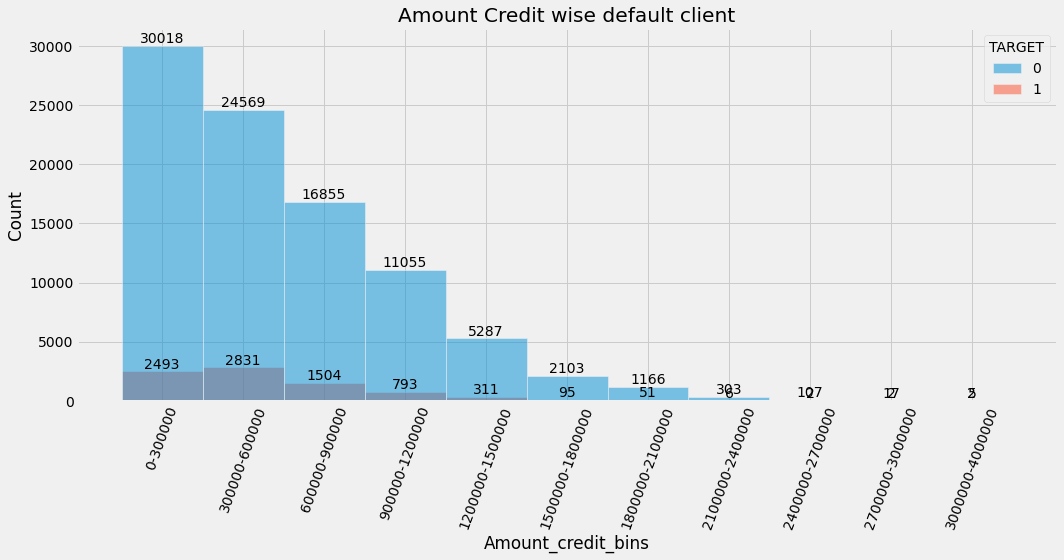

In [558]:
plt.figure(figsize=(15,8))

ax=sns.histplot(x="Amount_credit_bins",hue="TARGET",data= df)
plt.xticks(rotation=70)

for bar in ax.patches:
        h= bar.get_height()
        x= bar.get_x()+bar.get_width()/2
        ax.annotate(h, (x, h), va = "bottom", ha ="center" )
plt.title("Amount Credit wise default client")
plt.tight_layout()

95% of client having credit limit less than 1500000 USD 

# TARGET vs Car

Text(0.5, 1.3, 'Relation of Car ownership with Client Quality  ')

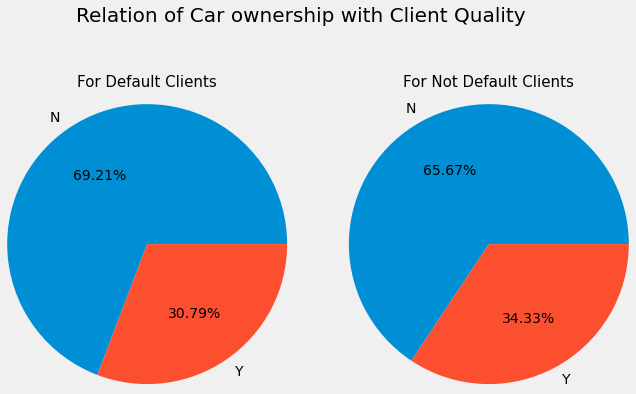

In [359]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
uni_pie_plot(df_T1,"Car")
plt.title ("For Default Clients",y=1.15,size= 15)

plt.subplot(1,2,2)
uni_pie_plot(df_T0,"Car")
plt.title ("For Not Default Clients",y=1.15,size= 15)

plt.suptitle("Relation of Car ownership with Client Quality  ",y=1.3,size=20)

31% of default clients owns a Car
Whereas 34% of Not default clients owns a Car

# Target Vs House

Text(0.5, 1.3, 'Relation of House ownership with Client Quality  ')

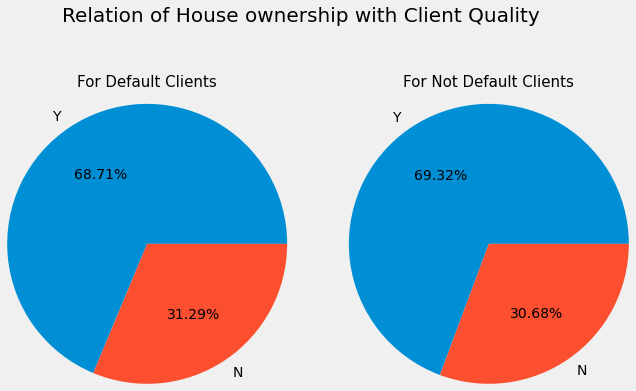

In [360]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
uni_pie_plot(df_T1,"House")
plt.title ("For Default Clients",y=1.15,size= 15)

plt.subplot(1,2,2)
uni_pie_plot(df_T0,"House")
plt.title ("For Not Default Clients",y=1.15,size= 15)

plt.suptitle("Relation of House ownership with Client Quality  ",y=1.3,size=20)

Almost same percent of defaulters and non defaulters owns a house

In [371]:
def bi_count_plot(df,col1,col2):
    ax=sns.countplot(x=col1,hue=col2,data= df,palette=["#CD3333","#98F5FF"])
    for i in ax.patches:
        h= i.get_height()
        x= i. get_x()+i.get_width()/2
        ax.annotate(round(h,2),(x,h), va = "bottom", ha ="center")

# Name_Contract_type Gender wise

Text(0.5, 1.1, 'Target= 1 : Not Defaulter Client')

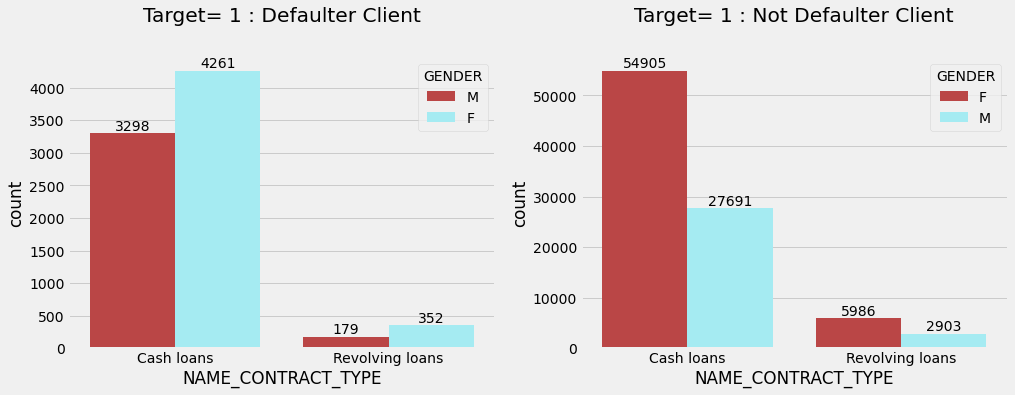

In [562]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
bi_count_plot(df_T1,"NAME_CONTRACT_TYPE","GENDER")
plt.title("Target= 1 : Defaulter Client",y=1.1)


plt.subplot(1,2,2)
bi_count_plot(df_T0,"NAME_CONTRACT_TYPE","GENDER")
plt.title("Target= 1 : Not Defaulter Client",y=1.1)

For both Target 1 and 0 , Cash Loans are more popular than Revolving Loans for both Male and Female clients

# Mobile vs TArget

Text(0.5, 1.3, 'Relation email Flag with Client Quality  ')

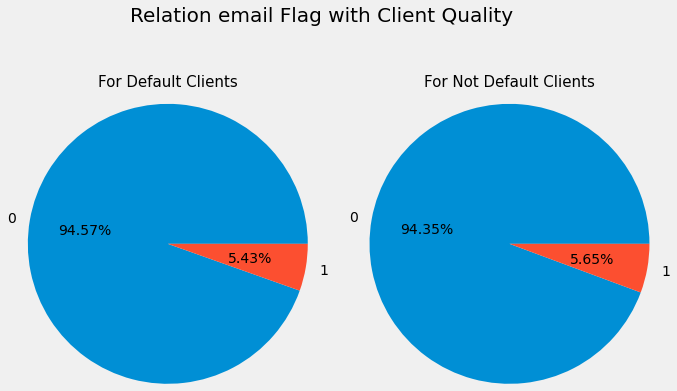

In [563]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
uni_pie_plot(df_T1,"FLAG_EMAIL")
plt.title ("For Default Clients",y=1.15,size= 15)

plt.subplot(1,2,2)
uni_pie_plot(df_T0,"FLAG_EMAIL")
plt.title ("For Not Default Clients",y=1.15,size= 15)

plt.suptitle("Relation email Flag with Client Quality  ",y=1.3,size=20)

Almost same percentage of default clients and not defaulter clients have provided their mail id

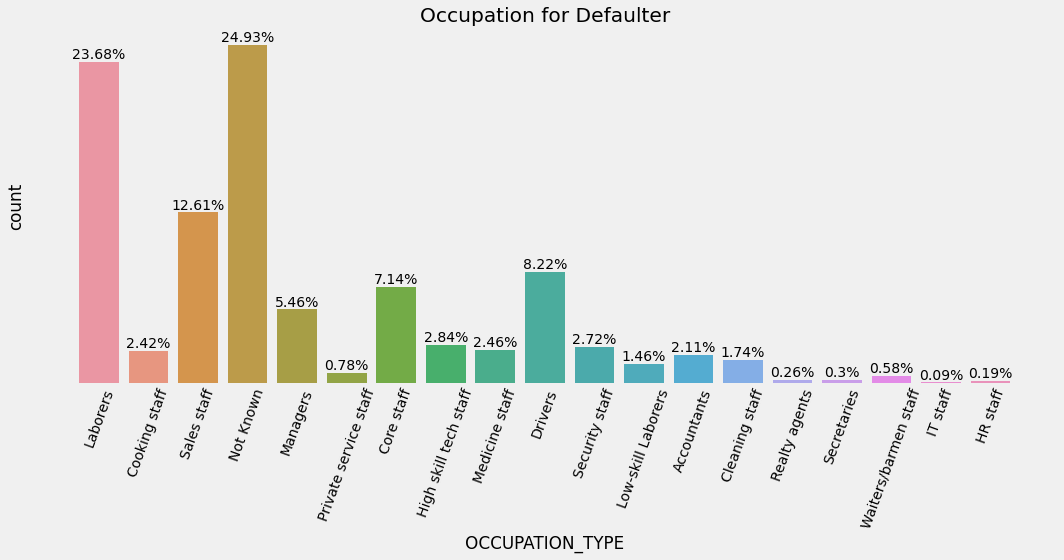

In [609]:
# plt.figure(figsize=(20,8))
# uni_count_plot(df_T1,"OCCUPATION_TYPE")

plt.figure(figsize=(15,8))

ax=sns.countplot(x="OCCUPATION_TYPE",data= df_T1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.plot("")
plt.title("Occupation for Defaulter")

for bar in ax.patches:
        h= bar.get_height()
        l = len(df_T1.OCCUPATION_TYPE)
        per=str(round( h*100 / l , 2)) + "%"
        x= bar.get_x()+bar.get_width()/2
        ax.annotate(per, (x, h), va = "bottom", ha ="center" )
plt.tight_layout()

25% of default client's occupation is unknown.
Bank need to  be strict towards not giving loan to applicant with out details of their respective occupation

# Target Wise income range

In [419]:
labels= ["0-100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-600000","600000-700000","700000-800000","800000-900000","900000-1000000"]

In [421]:
df["AMT_INCOME_BIN"]=pd.cut(x=df.AMT_INCOME_TOTAL, bins=len(labels),labels=labels)

In [422]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED,Amount_credit_bins,AMT_INCOME_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,1,0,1,0,Laborers,1.0,WEDNESDAY,1,300000-600000,100000-200000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1,0,1,0,Core staff,2.0,MONDAY,1,1200000-1500000,200000-300000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,1,1,1,0,Laborers,1.0,MONDAY,0,0-300000,0-100000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,1,0,1,0,Laborers,2.0,WEDNESDAY,1,0-300000,100000-200000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,1,0,1,0,Core staff,1.0,THURSDAY,1,300000-600000,0-100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,1,1,1,0,Sales staff,3.0,MONDAY,1,600000-900000,100000-200000
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,1,0,1,0,Managers,3.0,TUESDAY,1,0-300000,200000-300000
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,1,0,1,0,Sales staff,2.0,TUESDAY,1,1200000-1500000,100000-200000
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,1,0,1,0,Sales staff,2.0,FRIDAY,2,0-300000,100000-200000


Text(0.5, 1.05, 'Salary Range wise Applicants count')

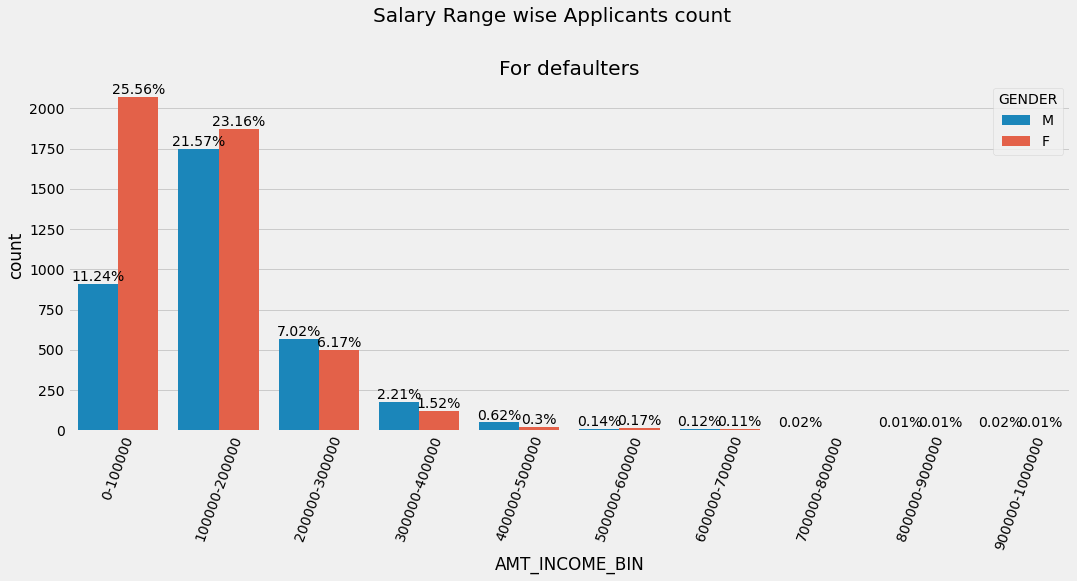

In [585]:
plt.figure(figsize=(16,6))

ax=sns.countplot(x="AMT_INCOME_BIN",hue="GENDER",data= df_T1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.title("For defaulters")
for bar in ax.patches:
        h= bar.get_height()
        l = len(df_T1.AMT_INCOME_BIN)
        per=str(round( h*100 / l , 2)) + "%"
        x= bar.get_x()+bar.get_width()/2
        ax.annotate(per, (x, h), va = "bottom", ha ="center" )
plt.suptitle("Salary Range wise Applicants count",y=1.05,size=20)

Majority of defaulters are from income category of 1lakh -2 lakh for both type of clients
Females are more likely to default in income range below 3lakhs whereas  males are more likely to get default at higher income range of more than 3lakhs

In [428]:
df.AMT_INCOME_TOTAL.value_counts()

135000.0    11639
112500.0     9944
157500.0     8631
180000.0     8010
90000.0      7225
            ...  
215487.0        1
729000.0        1
148423.5        1
197550.0        1
225112.5        1
Name: AMT_INCOME_TOTAL, Length: 1183, dtype: int64

# Contract Type Vs Target

Text(0.5, 1.3, 'Relation of CONTRACT_TYPE with Client Quality  ')

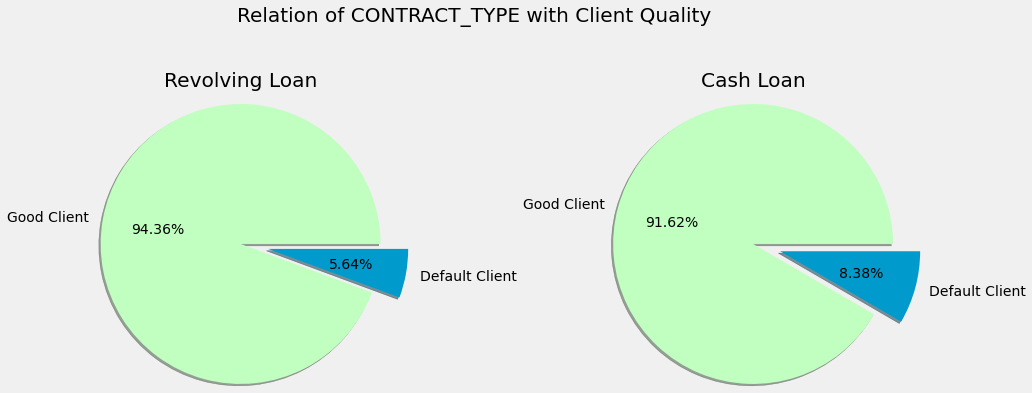

In [455]:
df_rev= df[df["NAME_CONTRACT_TYPE"]=="Revolving loans"]
df_cash=df[df["NAME_CONTRACT_TYPE"]=="Cash loans"]

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
data= df_rev["TARGET"].value_counts()
label= ["Good Client","Default Client"]
plt.pie(x=data,labels=label,autopct='%.2f%%',radius=1.5,explode=[0.0,0.3],shadow=True,colors=["#C1FFC1","#009ACD"])
plt.title("Revolving Loan",y=1.15)


plt.subplot(1,2,2)
data= df_cash["TARGET"].value_counts()
label= ["Good Client","Default Client"]
plt.pie(x=data,labels=label,autopct='%.2f%%',radius=1.5,explode=[0.0,0.3],shadow=True,colors=["#C1FFC1","#009ACD"])
plt.title("Cash Loan",y=1.15)

plt.suptitle("Relation of CONTRACT_TYPE with Client Quality  ",y=1.3,size=20)

Among  All the applicants of revolving loan 5.86% are default clients\
Among  All the applicants of Cash loan 8.38% are default clients\
Clearly, The chances are more for an applicant of a Cash loan to become \
a default client than that of an applicant of a Revolving loan 

# For default clients with credit amount more than 5lakhs

In [459]:
df5= df_T1[df_T1.AMT_CREDIT>500000]
df5.NAME_CONTRACT_TYPE.value_counts()

Cash loans         3959
Revolving loans      33
Name: NAME_CONTRACT_TYPE, dtype: int64

Text(0.5, 1.15, 'Default client with Credit Amount more than 5Lakhs')

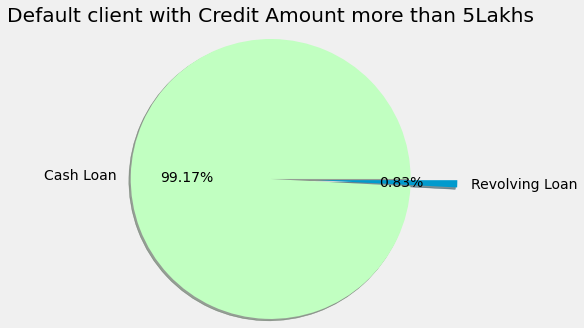

In [462]:
data= df5["NAME_CONTRACT_TYPE"].value_counts()
label= ["Cash Loan","Revolving Loan"]
plt.pie(x=data,labels=label,autopct='%.2f%%',radius=1.5,explode=[0.0,0.5],shadow=True,colors=["#C1FFC1","#009ACD"])
plt.title("Default client with Credit Amount more than 5Lakhs",y=1.15)

99% Default client with Credit Amount more than 5Lakhs are applicant of CASH Loan\
For more than 5 lakh bank should provide only Revolving Loan

# Occupation depends on TARGET

C:\Users\kalya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Occupation for defaulters')

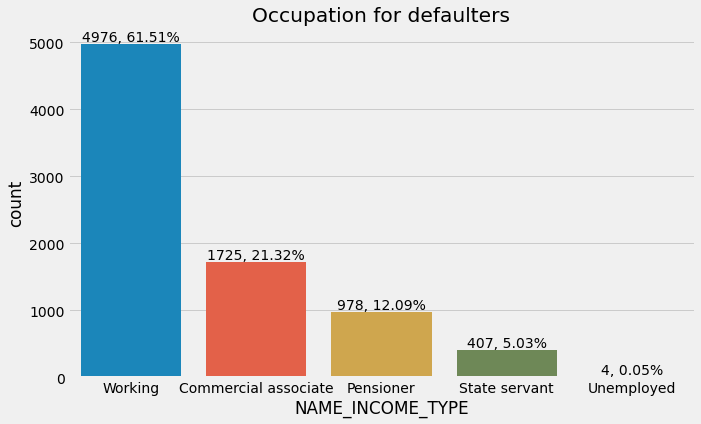

In [591]:
plt.figure(figsize=(10,6))
uni_count_plot(df_T1,"NAME_INCOME_TYPE",)
plt.title("Occupation for defaulters")

61.5% of defaulters are Working

C:\Users\kalya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Family status of the Defaulter client ')

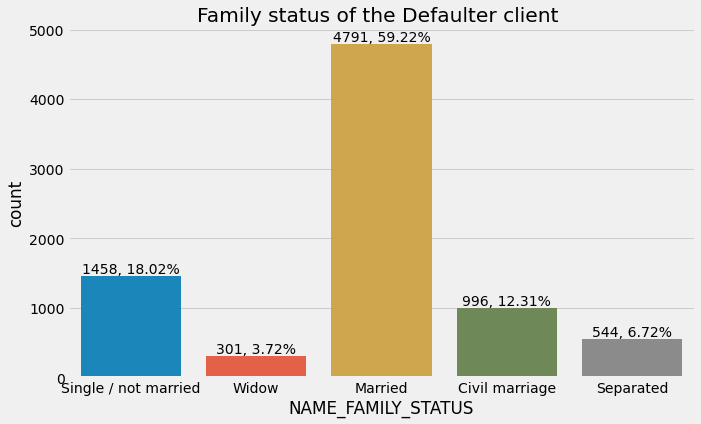

In [592]:
plt.figure(figsize=(10,6))
uni_count_plot(df_T1,"NAME_FAMILY_STATUS")
plt.title("Family status of the Defaulter client ")

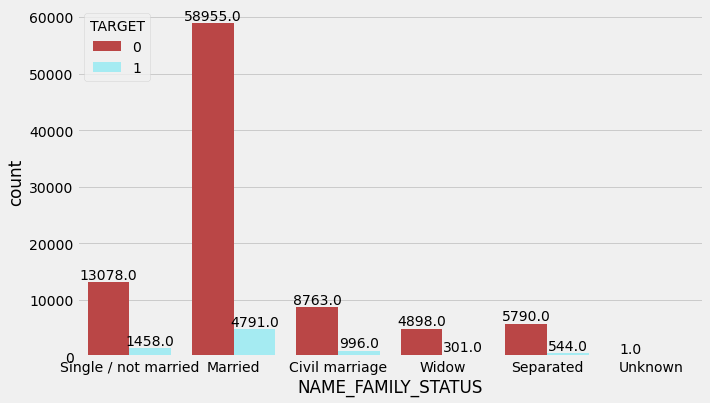

In [490]:
plt.figure(figsize=(10,6))
bi_count_plot(df,"NAME_FAMILY_STATUS","TARGET")

In [511]:
df.CNT_FAM_MEMBERS.describe()

count    99575.000000
mean         2.156776
std          0.909627
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [510]:
df_T1.CNT_FAM_MEMBERS.value_counts()

2.0     3906
1.0     1863
3.0     1520
4.0      667
5.0      106
6.0       21
7.0        3
8.0        2
10.0       1
13.0       1
Name: CNT_FAM_MEMBERS, dtype: int64

In [512]:
df.CNT_FAM_MEMBERS.value_counts()

2.0     51428
1.0     21713
3.0     17143
4.0      7952
5.0      1155
6.0       139
7.0        31
8.0         8
9.0         2
10.0        2
13.0        1
14.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

Text(0.5, 1.0, 'Total document submitted with Client quality')

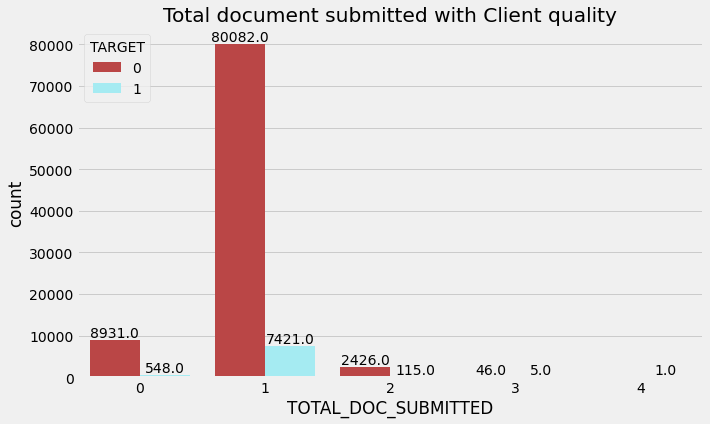

In [508]:
plt.figure(figsize=(10,6))
bi_count_plot(df,"TOTAL_DOC_SUBMITTED","TARGET")
plt.title("Total document submitted with Client quality")

Majority of Applicant has submitted only one document.

Text(1, -1.35, '0: Not Default Client')

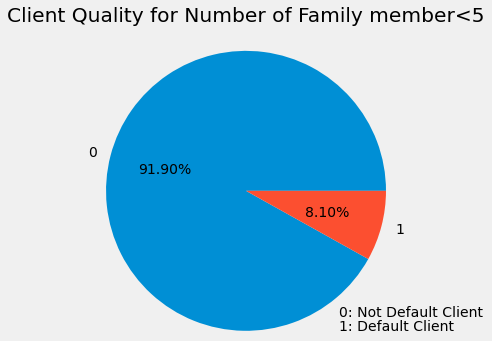

In [606]:
d_6=df[df["CNT_FAM_MEMBERS"]<5]
uni_pie_plot(d_6,"TARGET")
plt.title("Client Quality for Number of Family member<5",y=1.2)
plt.text(1,-1.5,s="1: Default Client")
plt.text(1,-1.35,s="0: Not Default Client")

Text(1, -1.35, '0: Not Default Client')

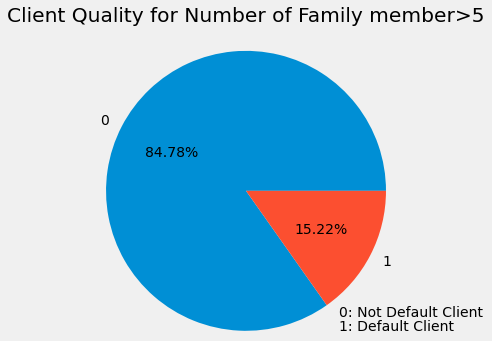

In [608]:
d_7=df[df["CNT_FAM_MEMBERS"]>5]
uni_pie_plot(d_7,"TARGET")
plt.title("Client Quality for Number of Family member>5",y=1.2)
plt.text(1,-1.5,s="1: Default Client")
plt.text(1,-1.35,s="0: Not Default Client")

In [621]:
df_T1.groupby("GENDER")["AMT_CREDIT"].mean()

GENDER
F    557660.633861
M    555202.725194
Name: AMT_CREDIT, dtype: float64

For Family member > 5 ,15.22% of applicants are defaults i,e \
1 out of 6 applicants having Family member > 5 are default client \
\
For Family member < 5 ,8.10% of applicants are defaults i,e \
1 out of 12 applicants having Family member < 5 are default client

Before approving loan for applicant with number of family member >5 proper inspection should be done 

Final Conclusion: 
    
    1.An applicant of a Cash loan have higher chance of becoming an defaulter than a applicant of revolving loan   
    2.1 out of every 6 applicants, having Family member > 5 is a Defaulter. 
    3.25% of default client's occupation is unknown.
    4.Majority of the of Defaulters are Married
    
Final Suggestion :

    1. Firm should promote Revolving loan more. Also, for credit amount more than
    5 lakhs firm should approve Revolving loan only.
    2. Firm should inspect all the submitted documents minutely for applicants with family member >5 
    3.The Firm is advised to be strict towards not giving credit approval to applicants with out 
    details of their respective occupation
    4. Firm can issue some cashback rewards for timely paying for installment 
